## **Text To Image Genration:-**

#### **Working with StableDiffusionModels**

In [30]:
# diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelearate

ERROR: Could not find a version that satisfies the requirement accelearate (from versions: none)
ERROR: No matching distribution found for accelearate


In [31]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [32]:
!pip show torch


Name: torch
Version: 2.5.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [33]:
model_id1='dreamlike-art/dreamlike-diffusion-1.0'
model_id2='stabilityai/stable-diffusion-xl-base-1.0'

In [34]:
pipe=StableDiffusionPipeline.from_pretrained(model_id1,torch_dtype=torch.float16,use_safetensors=True)
pipe=pipe.to('cuda')

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [35]:
prompt="dreamlikeart, a gruny woman with rainbow hair, travelling between dimensions,dynamic pose,happy, soft extreme bokeh, dainty figure, long hair straingth down, torn kawaii shirt and baggy jeanse"

In [39]:
image=pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  dreamlikeart, a gruny woman with rainbow hair, travelling between dimensions,dynamic pose,happy, soft extreme bokeh, dainty figure, long hair straingth down, torn kawaii shirt and baggy jeanse


(-0.5, 639.5, 639.5, -0.5)

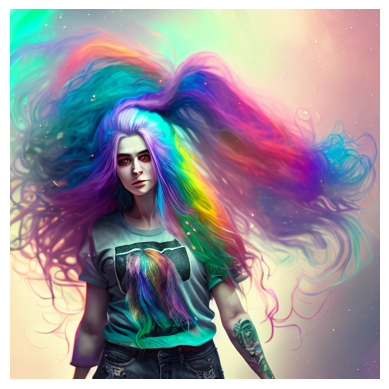

In [37]:
print('[PROMPT]: ',prompt)
plt.imshow(image)
plt.axis('off')

## **Working with StableDiffusionModels**
- Negative Prompting
- num_inference_steps
- height
- weight
- num_images_per_prompt


In [53]:
def genrate_image(pipe,prompt,params):
  img = pipe(prompt, **params).images

  num_images=len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1,ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');
  else:
      fig=plt.figure()
      plt.imshow(img[0]);
      plt.axis('off');
  plt.tight_layout()


In [54]:
prompt="dream, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"
params={}

  0%|          | 0/50 [00:00<?, ?it/s]

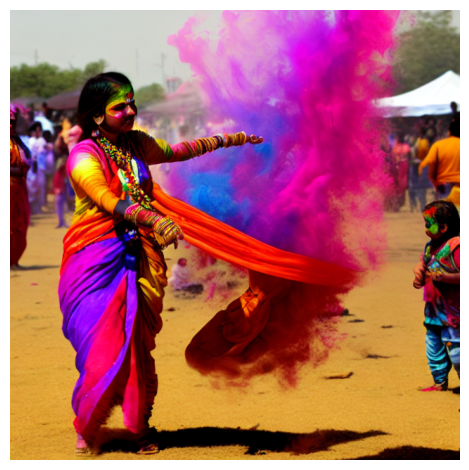

In [55]:
genrate_image(pipe,prompt,params)

  0%|          | 0/50 [00:00<?, ?it/s]

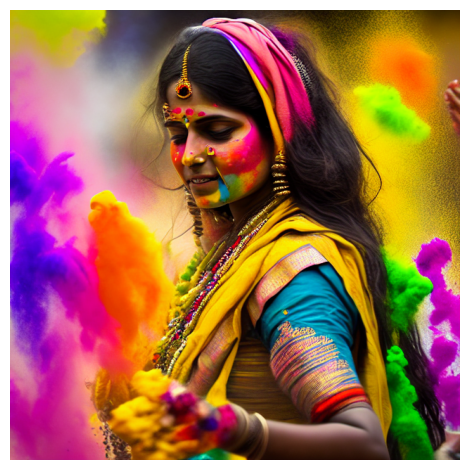

In [56]:
#num inference steps
params= {'num_inference_steps ':100}
images=genrate_image(pipe,prompt,params)


  0%|          | 0/100 [00:00<?, ?it/s]

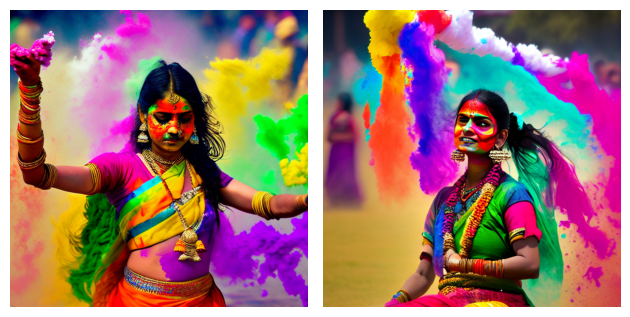

In [57]:
params={'num_inference_steps':100,'num_images_per_prompt':2}
genrate_image(pipe,prompt,params)